In [14]:
import pandas as pd
import numpy as np
import collections as coll
from scipy import stats
import statistics as stic

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Back Ground 1000

In [15]:
data_bg = pd.read_excel("Data_Input/Data.xlsx", sheet_name="Không có nguồn")
display(data_bg)

,Description,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Number of Runs,1000,NaN,NaN
1,Preset Time,10,NaN,NaN
2,Pause Time,0,NaN,NaN
3,Alarm Level,0,NaN,NaN
4,High Voltage,900,NaN,NaN
...,...,...,...,...
1005,996,900,9,10
1006,997,900,6,10
1007,998,900,8,10
1008,999,900,6,10


In [16]:
count_bg = data_bg["Unnamed: 2"][10:]
run_num_bg = np.arange(1, len(count_bg) +1)
C_bg = coll.Counter(sorted(count_bg))

# value
COUNT_BACKGROUND = np.array(list(C_bg.keys()))
FRE_BACKGROUND = np.array(list(C_bg.values()))

mean_count_bg = sum(COUNT_BACKGROUND*FRE_BACKGROUND)/sum(FRE_BACKGROUND)
standard_count_bg = np.sqrt(sum((COUNT_BACKGROUND- mean_count_bg)**2 * (FRE_BACKGROUND/sum(FRE_BACKGROUND))))
median_count_bg = stic.median(count_bg)

# Lost number
lost_bg = []
for i in range(len(COUNT_BACKGROUND)):
    Z = np.abs(COUNT_BACKGROUND[i] - mean_count_bg)/standard_count_bg
    GAMMA = 1 - 1/(2*sum(FRE_BACKGROUND))
    LIM = stats.norm.ppf(GAMMA + (1-GAMMA)/2)
    if Z > LIM:
        lost_bg.append("Lac")
    else:
        lost_bg.append("Khong Lac")

bg = {"So Dem (10s)": COUNT_BACKGROUND, "Tan Suat": FRE_BACKGROUND, "So Lac": lost_bg}
df_bg = pd.DataFrame(bg)
display(df_bg)
df_bg.to_excel("Data_Output/BackGround_1000.xlsx")

# Check Poisson distrubution or not
# chiinv=stats.chi2.isf(alpha,k-m-1)
limit_bg = stats.chi2.isf(0.05, 17-1-1)
p_bg = stats.poisson.pmf(COUNT_BACKGROUND, mean_count_bg)
Q_bg = np.sum((FRE_BACKGROUND - np.sum(FRE_BACKGROUND)*p_bg)**2 / (np.sum(FRE_BACKGROUND)*p_bg))

if (Q_bg > limit_bg):
    print("Khong tuan theo phan bo Poisson")
else:
    print("Tuan theo phan bo Poisson")

print("Gia tri trung binh: " + str(round(mean_count_bg, 2)))
print("Phuong sai: " + str(round(standard_count_bg**2, 2)))
print("Do lech chuan: " + str(round(standard_count_bg, 2)))
print("Trung vi: " + str(round(median_count_bg, 2)))
print("Gia tri thong ke kiem dinh Poisson Q_{10000}^{2} = " + str(round(Q_bg, 2)))
print("Gia tri toi han Chi_{17-1-1}^{2} = " + str(round(limit_bg, 2)))

print("Gia tri so dem nho nhat", min(COUNT_BACKGROUND))
print("Gia tri so dem lon nhat", max(COUNT_BACKGROUND))
print("Gia tri tan so lon nhat", max(FRE_BACKGROUND))

,So Dem (10s),Tan Suat,So Lac
0,0,1,Khong Lac
1,1,6,Khong Lac
2,2,38,Khong Lac
3,3,83,Khong Lac
4,4,108,Khong Lac
5,5,144,Khong Lac
6,6,181,Khong Lac
7,7,143,Khong Lac
8,8,119,Khong Lac
9,9,73,Khong Lac


Khong tuan theo phan bo Poisson
Gia tri trung binh: 6.34
Phuong sai: 6.21
Do lech chuan: 2.49
Trung vi: 6.0
Gia tri thong ke kiem dinh Poisson Q_{10000}^{2} = 26.39
Gia tri toi han Chi_{17-1-1}^{2} = 25.0
Gia tri so dem nho nhat 0
Gia tri so dem lon nhat 18
Gia tri tan so lon nhat 181


# Source 1000

In [17]:
data_sr = pd.read_excel("Data_Input/Data.xlsx", sheet_name="Có nguồn")
display(data_sr)

,Description,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Number of Runs,1000,NaN,NaN
1,Preset Time,2,NaN,NaN
2,Pause Time,0,NaN,NaN
3,Alarm Level,0,NaN,NaN
4,High Voltage,900,NaN,NaN
...,...,...,...,...
1005,996,900,98,2
1006,997,900,138,2
1007,998,900,110,2
1008,999,900,118,2


In [18]:
count_sr = data_sr["Unnamed: 2"][10:]
run_num_sr = np.arange(1, len(count_sr) +1)
C_sr = coll.Counter(sorted(count_sr))

# value
COUNT_SOURCE = np.array(list(C_sr.keys()))
FRE_SOURCE  = np.array(list(C_sr.values()))

mean_count_sr = sum(COUNT_SOURCE*FRE_SOURCE)/sum(FRE_SOURCE)
standard_count_sr = np.sqrt(sum((COUNT_SOURCE- mean_count_sr)**2 * (FRE_SOURCE/sum(FRE_SOURCE))))
median_count_sr = stic.median(count_sr)

# Lost number
lost_sr = []
for i in range(len(COUNT_SOURCE)):
    Z = np.abs(COUNT_SOURCE[i] - mean_count_sr)/standard_count_sr
    GAMMA = 1 - 1/(2*sum(FRE_SOURCE))
    LIM = stats.norm.ppf(GAMMA + (1-GAMMA)/2)
    if Z > LIM:
        lost_sr.append("Lac")
    else:
        lost_sr.append("Khong Lac")

sr = {"So Dem (2s)": C_sr.keys(), "Tan Suat": C_sr.values(), "So Lac": lost_sr}
df_sr = pd.DataFrame(sr)
display(df_sr)
df_sr.to_excel("Data_Output/Source_1000.xlsx")

# Check Poisson distrubution or not
# chiinv=stats.chi2.isf(alpha,k-m-1)
# limit_1 for pisson limit_2 for gauuss and cauchy
# alpha = 0.05
limit_1 = stats.chi2.isf(0.05, 72-1-1)
limit_2 = stats.chi2.isf(0.05, 72-2-1)

p_sr_poisson = []
p_sr_gauss = []
p_sr_lorentz = []

for i in range(len(COUNT_SOURCE)):
    p_sr_poisson.append( stats.poisson.pmf(k=COUNT_SOURCE[i], mu=mean_count_sr) )
    p_sr_gauss.append( stats.norm.pdf(COUNT_SOURCE[i],mean_count_sr,standard_count_sr) )
    p_sr_lorentz.append( stats.cauchy.pdf(COUNT_SOURCE[i], loc=mean_count_sr, scale=standard_count_sr) )

Q_sr_poisson = np.sum((FRE_SOURCE - np.sum(FRE_SOURCE)*np.array(p_sr_poisson))**2 / (np.sum(FRE_SOURCE)*np.array(p_sr_poisson)))
Q_sr_gauss = np.sum((FRE_SOURCE - np.sum(FRE_SOURCE) * np.array(p_sr_gauss))**2 / (np.sum(FRE_SOURCE) * np.array(p_sr_gauss)))
Q_sr_lorentz = np.sum((FRE_SOURCE - np.sum(FRE_SOURCE)*np.array(p_sr_lorentz))**2 / (np.sum(FRE_SOURCE)*np.array(p_sr_lorentz)))

if (Q_sr_poisson > limit_1):
    print("Khong tuan theo phan bo Poisson")
else:
    print("Tuan theo phan bo Poisson")

if (Q_sr_gauss > limit_2):
    print("Khong tuan theo phan bo Gauss")
else:
    print("Tuan theo phan bo Gauss")

if (Q_sr_lorentz > limit_2):
    print("Khong tuan theo phan bo Lorentz")
else:
    print("Tuan theo phan bo Lorentz")

print("Gia tri trung binh: " + str(round(mean_count_sr, 2)))
print("Phuong sai: " + str(round(standard_count_sr**2, 2)))
print("Do lech chuan: " + str(round(standard_count_sr, 2)))
print("Trung vi: " + str(round(median_count_sr, 2)))

print("Gia tri thong ke kiem dinh Poisson Q_{1000}^{2} = " + str(round(Q_sr_poisson, 2)))
print("Gia tri thong ke kiem dinh Gauss Q_{1000}^{2} = " + str(round(Q_sr_gauss, 2)))
print("Gia tri thong ke kiem dinh Poisson Q_{1000}^{2} = " + str(round(Q_sr_lorentz, 2)))

print("Gia tri toi han Chi_{72-1-1}^{2} = " + str(round(limit_1, 2)))
print("Gia tri toi han Chi_{72-2-1}^{2} = " + str(round(limit_2, 2)))

print("Gia tri so dem nho nhat", min(COUNT_SOURCE))
print("Gia tri so dem lon nhat", max(COUNT_SOURCE))
print("Gia tri tan so lon nhat", max(FRE_SOURCE))

,So Dem (2s),Tan Suat,So Lac
0,97,1,Khong Lac
1,98,1,Khong Lac
2,99,3,Khong Lac
3,100,1,Khong Lac
4,101,1,Khong Lac
...,...,...,...
67,165,2,Khong Lac
68,166,1,Khong Lac
69,167,1,Khong Lac
70,168,2,Khong Lac


Khong tuan theo phan bo Poisson
Tuan theo phan bo Gauss
Khong tuan theo phan bo Lorentz
Gia tri trung binh: 133.11
Phuong sai: 166.53
Do lech chuan: 12.9
Trung vi: 134.0
Gia tri thong ke kiem dinh Poisson Q_{1000}^{2} = 121.89
Gia tri thong ke kiem dinh Gauss Q_{1000}^{2} = 51.85
Gia tri thong ke kiem dinh Poisson Q_{1000}^{2} = 164.51
Gia tri toi han Chi_{72-1-1}^{2} = 90.53
Gia tri toi han Chi_{72-2-1}^{2} = 89.39
Gia tri so dem nho nhat 97
Gia tri so dem lon nhat 170
Gia tri tan so lon nhat 39


# Back Ground 30

In [19]:
data_bg_30 = pd.read_excel("Data_Input/Data_bg_30.xlsx")
display(data_bg_30)

,So Dem
0,41
1,35
2,35
3,36
4,39
5,39
6,29
7,29
8,39
9,44


In [20]:
count_bg_30 = data_bg_30["So Dem"][0:]
run_num_bg_30 = np.arange(1, len(count_bg_30) +1)
C_bg_30 = coll.Counter(sorted(count_bg_30))

# value
COUNT_BACKGROUND_30 = np.array(list(C_bg_30.keys()))
FRE_BACKGROUND_30 = np.array(list(C_bg_30.values()))

mean_count_bg_30 = sum(COUNT_BACKGROUND_30*FRE_BACKGROUND_30)/sum(FRE_BACKGROUND_30)
standard_count_bg_30 = np.sqrt(sum((COUNT_BACKGROUND_30 - mean_count_bg_30)**2 * (FRE_BACKGROUND_30/sum(FRE_BACKGROUND_30))))
median_count_bg_30 = stic.median(count_bg_30)

# Lost number
lost_bg_30 = []
for i in range(len(COUNT_BACKGROUND_30)):
    Z = np.abs(COUNT_BACKGROUND_30[i] - mean_count_bg_30)/standard_count_bg_30
    GAMMA = 1 - 1/(2*sum(FRE_BACKGROUND_30))
    LIM = stats.norm.ppf(GAMMA + (1-GAMMA)/2)
    if Z > LIM:
        lost_bg_30.append("Lac")
    else:
        lost_bg_30.append("Khong Lac")

bg_30 = {"So Dem (60s)": COUNT_BACKGROUND_30, "Tan Suat": FRE_BACKGROUND_30, "So Lac": lost_bg_30}
df_bg_30 = pd.DataFrame(bg_30)
display(df_bg_30)
df_bg.to_excel("Data_Output/BackGround_30.xlsx")

# Check Poisson distrubution or not
# chiinv=stats.chi2.isf(alpha,k-m-1)
limit_bg_30 = stats.chi2.isf(0.05, 14-1-1)
p_bg_30 = stats.poisson.pmf(COUNT_BACKGROUND_30, mean_count_bg_30)
Q_bg_30 = np.sum((FRE_BACKGROUND_30 - np.sum(FRE_BACKGROUND_30)*np.array(p_bg_30))**2 / (np.sum(FRE_BACKGROUND_30)*np.array(p_bg_30)))

if (Q_bg_30 > limit_bg_30):
    print("Khong tuan theo phan bo Poisson")
else:
    print("Tuan theo phan bo Poisson")

print("Gia tri trung binh: " + str(round(mean_count_bg_30, 2)))
print("Phuong sai: " + str(round(standard_count_bg_30**2, 2)))
print("Do lech chuan: " + str(round(standard_count_bg_30, 2)))
print("Trung vi: " + str(round(median_count_bg_30, 2)))

print("Gia tri thong ke kiem dinh Poisson Q_{30}^{2} = " + str(round(Q_bg_30, 2)))
print("Gia tri toi han Chi_{17-1-1}^{2} = " + str(round(limit_bg_30, 2)))

,So Dem (60s),Tan Suat,So Lac
0,25,1,Lac
1,29,2,Khong Lac
2,30,1,Khong Lac
3,33,4,Khong Lac
4,35,3,Khong Lac
5,36,2,Khong Lac
6,37,2,Khong Lac
7,38,1,Khong Lac
8,39,7,Khong Lac
9,40,1,Khong Lac


Khong tuan theo phan bo Poisson
Gia tri trung binh: 36.73
Phuong sai: 21.26
Do lech chuan: 4.61
Trung vi: 37.5
Gia tri thong ke kiem dinh Poisson Q_{30}^{2} = 24.54
Gia tri toi han Chi_{17-1-1}^{2} = 21.03


# export data to draw chart by ROOT

In [21]:
only_bg_1000 = {"So Dem": count_bg}
only_df_bg_1000 = pd.DataFrame(only_bg_1000)
only_df_bg_1000.to_csv("Data_Output/Only_BackGround_1000.txt", index=False)

only_sr_1000 = {"So Dem": count_sr}
only_df_sr_1000 = pd.DataFrame(only_sr_1000)
only_df_sr_1000.to_csv("Data_Output/Only_Source_1000.txt", index=False)

# Fitting Gauss Source 

[165.14169523   6.06933998  -2.39258383]


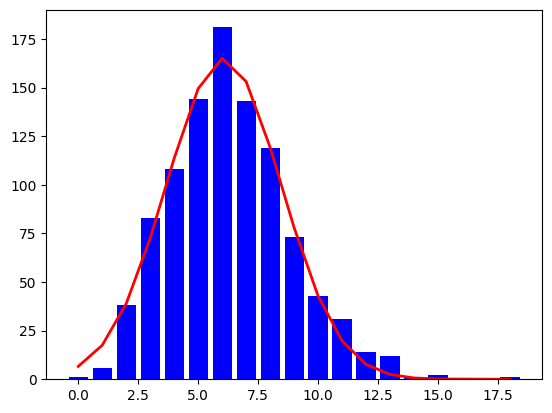

In [29]:
def Gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# Bar chart Source
plt.bar(COUNT_BACKGROUND, FRE_BACKGROUND, color='blue', label="Data of Source")

# Add paramenters and R^2
popt, pcov = curve_fit(Gauss, COUNT_BACKGROUND, FRE_BACKGROUND)
# Print paramentes 
print (popt) 

# Draw fitiing gauss to chart
ym = Gauss(COUNT_BACKGROUND, popt[0], popt[1], popt[2])
plt.plot(COUNT_BACKGROUND, ym, color='red' ,linewidth=2, label='Gauss Fitting')

plt.legend();